# Testing DB

In [9]:
from sklearn import datasets

a = datasets.fetch_california_housing()
print(a.target)

b = datasets.load_digits()
print(b.images[4])

c = datasets.load_iris()
print(c["DESCR"])

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.8

# Imputation
> Imputation in data science refers to the process of replacing missing or incomplete data with substituted values. In datasets, missing values are common and can arise from various reasons like data entry errors, equipment failures, or intentional omission. Imputation is essential because many data analysis algorithms require a complete dataset to function properly.

Types of Imputation:
- **Mean/Median/Mode Imputation:**
    Mean: Replace missing values with the mean (average) of the non-missing values in that column.
    Median: Replace missing values with the median of the non-missing values, useful for skewed data.
    Mode: Replace missing values with the mode (most frequent value), often used for categorical data.
    Imputation Using k-Nearest Neighbors (k-NN):

    Missing values are imputed using the values from the nearest neighbors in the dataset. This method considers the similarity between data points.

- **Regression Imputation:**
    A regression model is built to predict missing values based on other variables in the dataset. The missing value is then replaced with the predicted value.
    Multiple Imputation:

    Instead of filling in a single value for each missing data point, multiple imputed datasets are created, and the results are pooled to account for the uncertainty of the missing data.

- **Forward/Backward Fill:**
    Forward Fill: Propagates the last observed value forward to fill missing values.
    Backward Fill: Propagates the next observed value backward to fill missing values.

- **Interpolation:**
    Estimates missing data points within the range of a discrete set of known data points using methods like linear or spline interpolation.

In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df.fillna(df.median(), inplace=True)
print(df.head(10))

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
0            842     0          2.2         0   1       0        32.0
1           1021     1          0.5         1   0       1        53.0
2            563     1          0.5         1   2       1        41.0
3            615     1          2.5         0   0       0        10.0
4           1821     1          1.2         0  13       1        44.0
5           1859     0          0.5         1   3       0        22.0
6           1821     0          1.7         0   4       1        10.0
7           1954     0          0.5         1   0       0        24.0
8           1445     1          0.5         0   0       0        53.0
9            509     1          0.6         1   2       1         9.0


# Feature Importance

[0.20858491 0.02047109 0.1589173  0.01475345 0.14399836 0.03281621
 0.42045867]


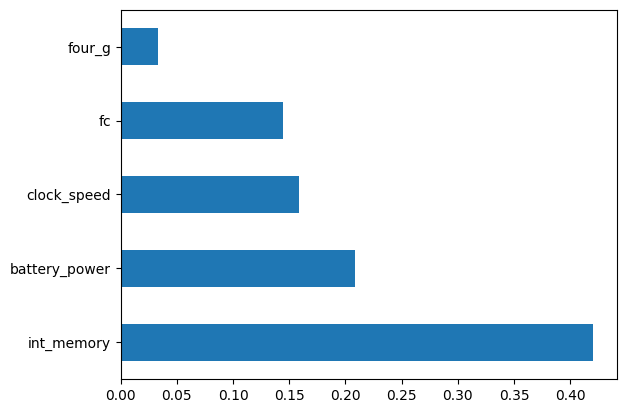

In [2]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# selects all rows (:) and columns from index 0 to 19 (0:20). This means it takes the first 20 columns of the DataFrame df
x = df.iloc[:, 0:20]
x = x.fillna(x.median())
# selects all rows (:) and the last column (-1). This means it takes the last column of the DataFrame df
y = df.iloc[:, -1]
y = y.fillna(y.median())

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def minmax_demo():
    data = pd.read_csv("dating.txt",delimiter="\t")
    print("data:\n",data)
    data = data.iloc[:,:3]
    transfer = MinMaxScaler(feature_range=(1,2))
    data_new = transfer.fit_transform(data)
    print("data after scaling:\n",data_new)

minmax_demo()

data:
    milage     liters  consimtime  target
0   14488   7.153469    1.673904       2
1   26050   1.441871    0.805124       1
2   75136  13.147394    0.428964       1
3   38344   1.669788    0.134296       1
4   72993  10.141740    1.032955       1
5   35948   6.830792    1.213192       3
6   42666  13.276369    0.543880       3
7   67497   8.631577    0.749278       1
8   35483  12.273169    1.503053       3
9   50242   3.723498    0.831917       1
data after scaling:
 [[1.         1.48262275 2.        ]
 [1.19064108 1.         1.43571351]
 [2.         1.98910178 1.19139157]
 [1.3933518  1.0192587  1.        ]
 [1.96466495 1.73512784 1.58369338]
 [1.35384514 1.45535696 1.70076019]
 [1.46461549 2.         1.26603135]
 [1.87404366 1.60752099 1.39944064]
 [1.34617794 1.91523088 1.88902955]
 [1.58953304 1.19279457 1.45311599]]
